# 回路の基本

In [16]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator

In [2]:
circ = QuantumCircuit(3)

In [3]:
circ.h(0)

In [4]:
circ.cx(0,1) #control 0, target 1

In [5]:
circ.cx(0,2)

## 回路の可視化

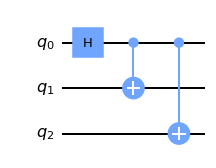

In [6]:
circ.draw('mpl')

## 回路のシミュレーション

In [11]:
state = Statevector.from_int(0,2**3)
state = state.evolve(circ) #generate GHZ state
state.draw('latex')

<IPython.core.display.Latex object>

In [12]:
array_to_latex(state)

<IPython.core.display.Latex object>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/qiskit/visualization/bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


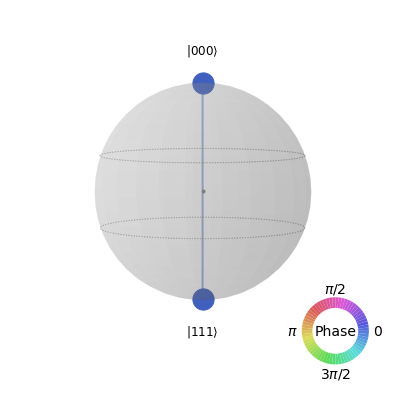

In [13]:
state.draw('qsphere')

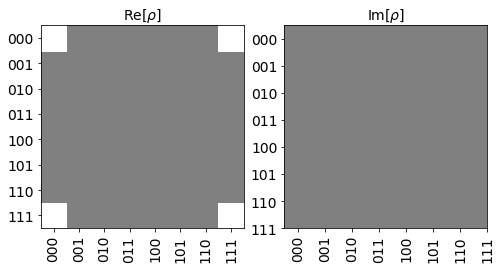

In [14]:
state.draw('hinton')

## 回路のユニタリー表現

In [17]:
U = Operator(circ)

In [19]:
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

## OpenQASM バックエンド

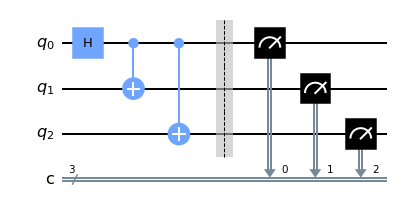

In [20]:
meas = QuantumCircuit(3,3)
meas.barrier(range(3))
meas.measure(range(3),range(3))
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl')